# Electrical Fault Detection 
We simulate the circuit under normal conditions as well as under various fault conditions. We then collect and save the measured Line Voltages and Line Currents at the output side of the power system. The faults on electrical power system transmission lines are supposed to be first detected and classified correctly and should be cleared in the least possible time.
* [0 0 0 0] - No Fault
* [1 0 0 1] - LG fault (Between Phase A and Gnd)
* [0 0 1 1] - LL fault (Between Phase A and Phase B)
* [1 0 1 1] - LLG Fault (Between Phases A,B and ground)
* [0 1 1 1] - LLL Fault(Between all three phases)
* [1 1 1 1] - LLLG fault( Three phase symmetrical fault)


### Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\1790553364.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing classifying data into dataframe
data = pd.read_csv('classData.csv')
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


### Initial Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [5]:
# checking for null values in the data 
data.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
G,7861.0,0.432006,0.495387,0.000000,0.000000,0.000000,1.000000,1.000000
C,7861.0,0.411271,0.492095,0.000000,0.000000,0.000000,1.000000,1.000000
B,7861.0,0.555527,0.496939,0.000000,0.000000,1.000000,1.000000,1.000000
A,7861.0,0.571429,0.494903,0.000000,0.000000,1.000000,1.000000,1.000000
Ia,7861.0,13.721194,464.741671,-883.542316,-119.802518,2.042805,227.246377,885.738571
Ib,7861.0,-44.845268,439.269195,-900.526951,-271.845947,5.513317,91.194282,889.868884
Ic,7861.0,34.392394,371.107412,-883.357762,-61.034219,-4.326711,49.115141,901.274261
Va,7861.0,-0.007667,0.289150,-0.620748,-0.130287,-0.005290,0.111627,0.595342
Vb,7861.0,0.001152,0.313437,-0.608016,-0.159507,0.001620,0.153507,0.627875
Vc,7861.0,0.006515,0.307897,-0.612709,-0.215977,0.009281,0.239973,0.600179


* Distribution of Volatages and Currents


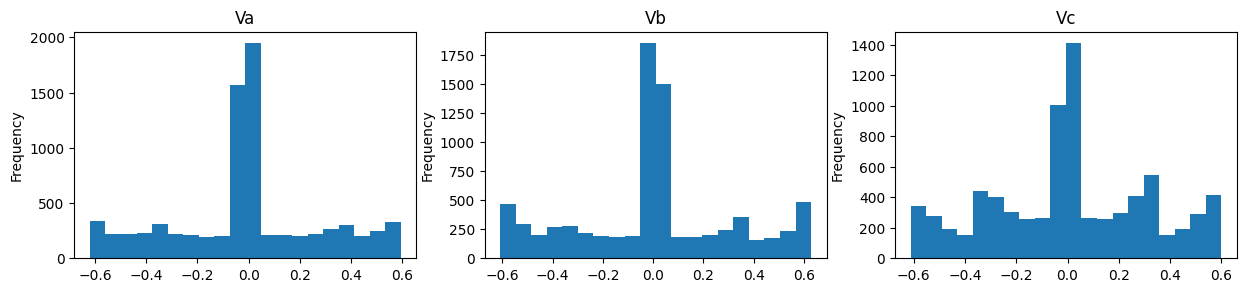

In [18]:
# ploting histograms to see distribution of voltages by phase
voltages = ['Va', 'Vb', 'Vc']

plt.figure(figsize=(15,10))

for n,v in enumerate(voltages):
    plt.subplot(3, 3, n+1)
    data[v].plot(kind='hist', bins =20)
    plt.title(v)
    

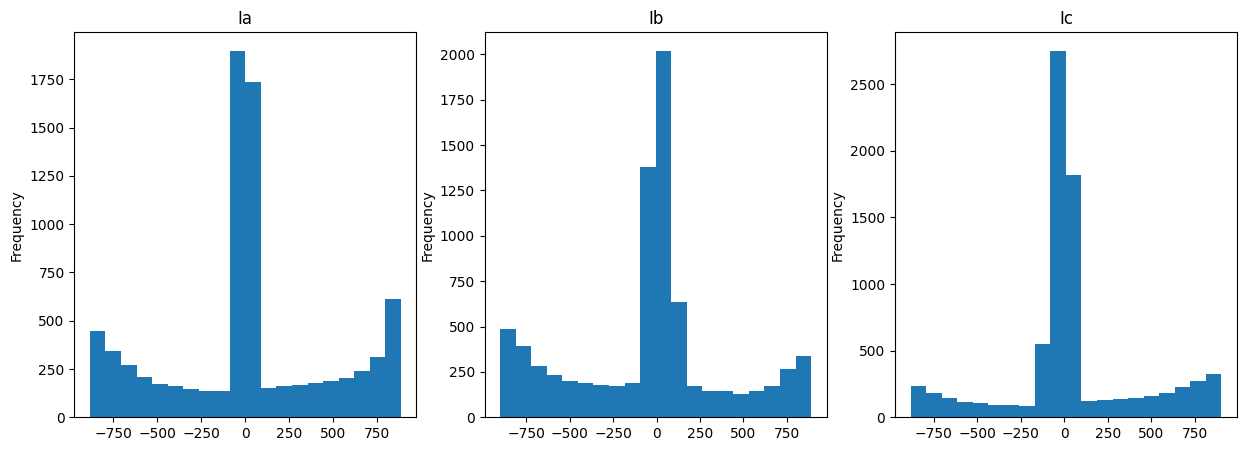

In [25]:
# ploting histograms to see distribution of currents by phase
currents = ['Ia', 'Ib', 'Ic']

plt.figure(figsize=(15,5))

for n,i in enumerate(currents):
    plt.subplot(1, 3, n+1)
    data[i].plot(kind='hist', bins=20)
    plt.title(i)

* Centrality Measures of Voltages and Currents

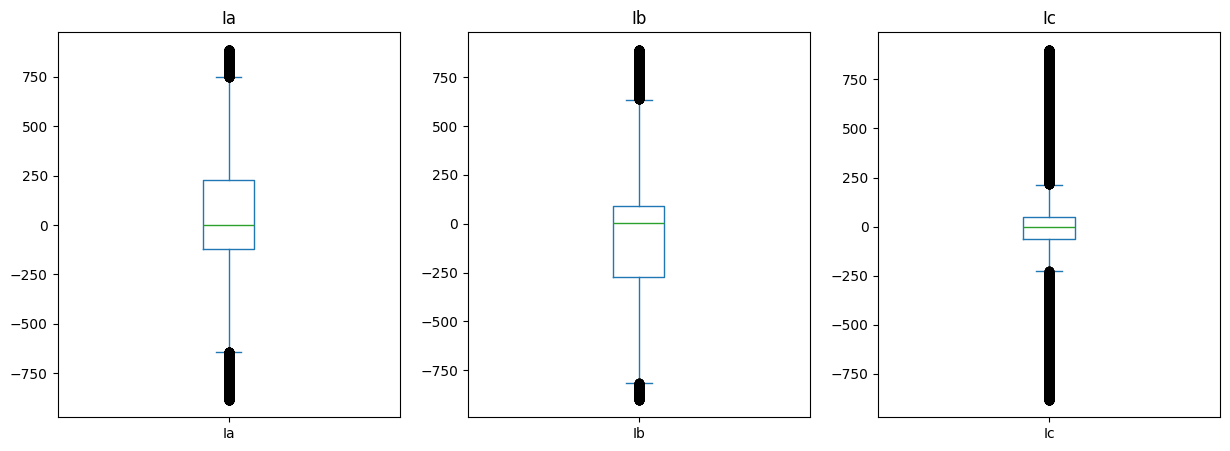

In [28]:
# Checking for outliers
currents = ['Ia', 'Ib', 'Ic']

plt.figure(figsize=(15, 5))


for n,i in enumerate(currents):
    plt.subplot(1, 3, n+1)
    data[i].plot(kind='box')
    plt.title(i)

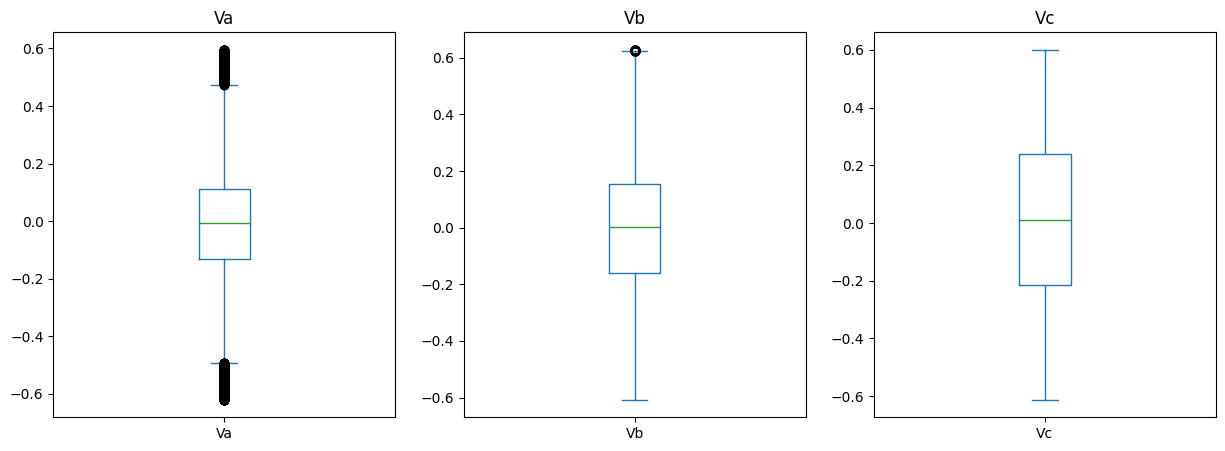

In [29]:
voltages = ['Va', 'Vb', 'Vc']
plt.figure(figsize=(15, 5))


for n,v in enumerate(voltages):
    plt.subplot(1, 3, n+1)
    data[v].plot(kind='box')
    plt.title(v)

In [31]:
# create a Fault Type column
data['Fault Type'] = data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')
data.head() 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [34]:
# assigning fault names
data['Fault Type'][data['Fault Type'] == '0000' ] = 'NO Fault'
data['Fault Type'][data['Fault Type'] == '1001' ] = 'Line A to Ground Fault'
data['Fault Type'][data['Fault Type'] == '0110' ] = 'Line B to Line C Fault'
data['Fault Type'][data['Fault Type'] == '1011' ] = 'Line A Line B to Ground Fault'
data['Fault Type'][data['Fault Type'] == '0111' ] = 'Line A Line B Line C'
data['Fault Type'][data['Fault Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\1729041114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fault Type'][data['Fault Type'] == '0000' ] = 'NO Fault'
C:\Users\hp\AppData\Local\Temp\ipykernel_28008\1729041114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fault Type'][data['Fault Type'] == '1001' ] = 'Line A to Ground Fault'
C:\Users\hp\AppData\Local\Temp\ipykernel_28008\1729041114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [35]:
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


Text(0.5, 1.0, 'Fault Type Count')

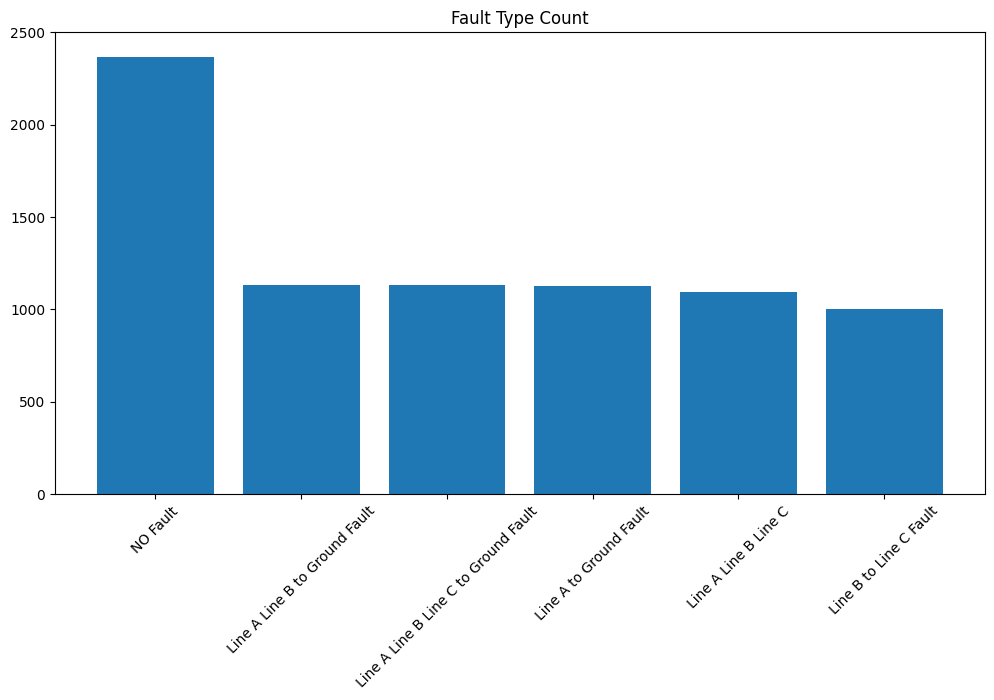

In [51]:
# count of each fault category to identify potential class imbalances.
# sns.barplot(data['Fault Type'])

plt.figure(figsize=(12, 6))
ax =plt.bar(x=data['Fault Type'].value_counts().index, height=data['Fault Type'].value_counts())
plt.xticks(rotation=45)
plt.ylim(top=2500)
plt.title('Fault Type Count')


Text(0.5, 1.0, 'Voltage Readings')

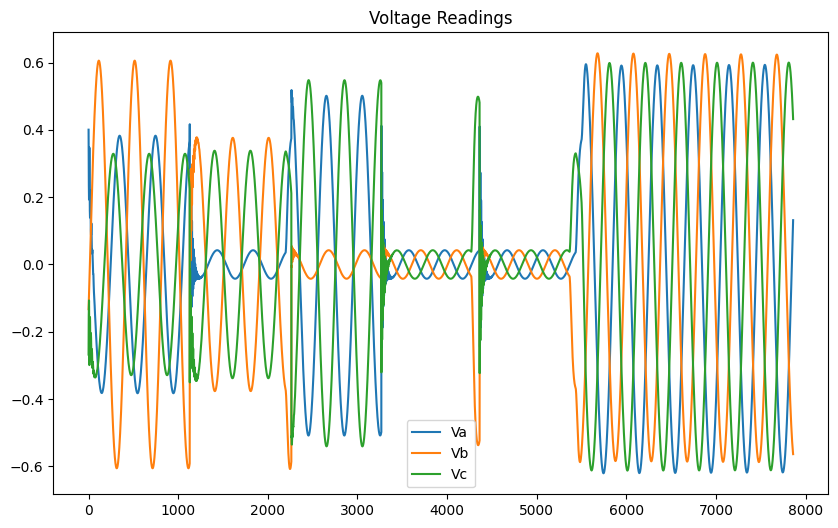

In [64]:
plt.figure(figsize=(10,6))
data['Va'].plot()
data['Vb'].plot()
data['Vc'].plot()
plt.legend()
plt.title('Voltage Readings')

Text(0.5, 1.0, 'No Fault Voltages')

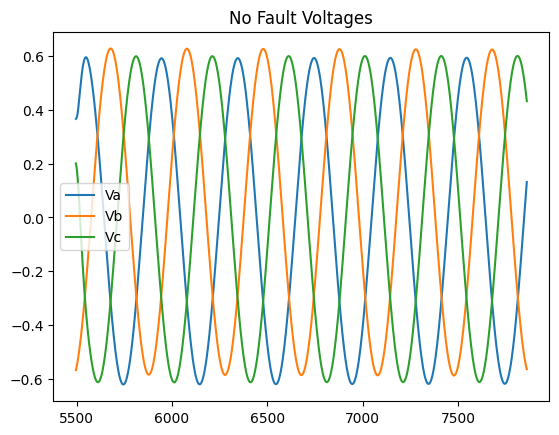

In [62]:
df_nf = data[data['Fault Type']== 'NO Fault']
df_nf[['Va', 'Vb', 'Vc']].plot()
plt.title('No Fault Voltages')

* there are voltage fluctuations when there is a fault
* in some cases the voltage is reduced when there is a fault. In this scenario the current increases

Text(0.5, 1.0, 'Current Readings')

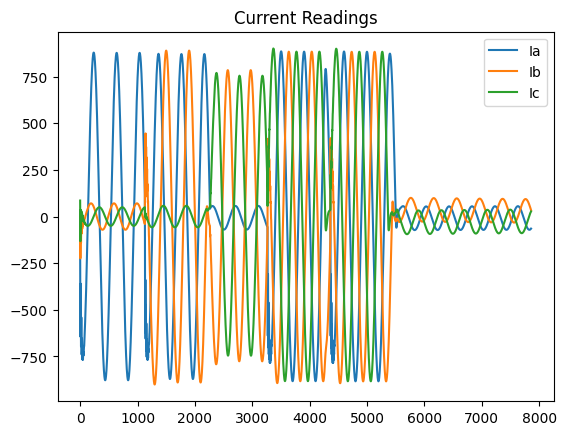

In [63]:
data[['Ia', 'Ib', 'Ic']].plot()
plt.title('Current Readings')

* when there is a fault the current increases drastically

<Axes: >

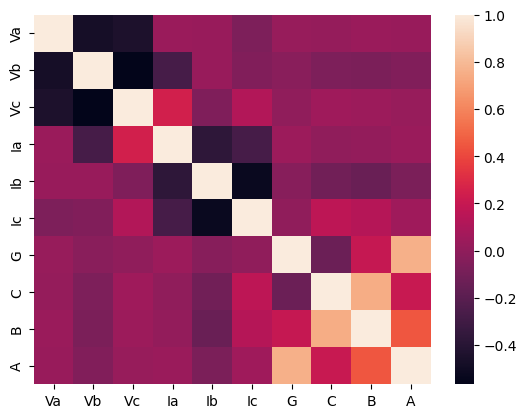

In [67]:
sns.heatmap(data[['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic', 'G', 'C', 'B', 'A']].corr())

### Modeling

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Fault Type'] = le.fit_transform(data['Fault Type'])
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3
